# Viewing notifications and users

In this notebook we're trying to get a glimpse into users and notifications data over our data sample.

In [1]:
from lib.config import Config
from lib.models.notification import Notification

In [2]:
notifications_filepath = "../data/notifications.csv"

In [3]:
notifications = list()
with open(notifications_filepath, "r") as fp:
    for line in fp.readlines():
        notifications.append(Notification.from_line(line, Config.CSV_HEADERS, ','))

In [39]:
print(f"Number of notifications: {len(notifications)}")
print(f"First notification at: {notifications[0].timestamp}")
print(f"Last notification at: {notifications[-1].timestamp}")
print(f"Sample time span: {notifications[-1].timestamp - notifications[0].timestamp}")

Number of notifications: 337657
First notification at: 2017-08-01 00:06:47
Last notification at: 2017-10-01 01:33:12
Sample time span: 61 days, 1:26:25


In [42]:
# Number of notifications sent to given user over time window
users = dict()
for notification in notifications:
    if notification.user_id not in users:
        users[notification.user_id] = 1
    
    else:
        users[notification.user_id] += 1
    
# Count for distinct notifications count
notifications_count = dict()
for value in users.values():
    if value not in notifications_count:
        notifications_count[value] = 1
        
    else:
        notifications_count[value] += 1

<IPython.core.display.Javascript object>


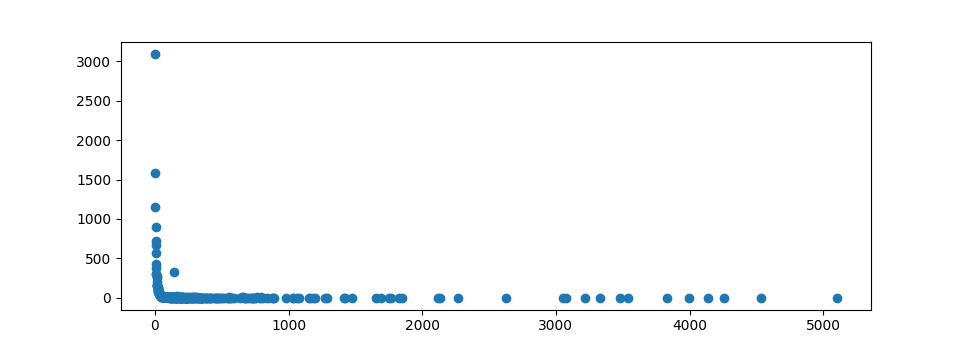

In [43]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.scatter(values_count.keys(), values_count.values())
plt.show()

In [38]:
span = notifications[-1].timestamp - notifications[0].timestamp
span_seconds = span.total_seconds()

print(f"Total number of users: {len(users)}")
print(f"Average number of notifications per user: {sum(users.values()) / len(users)} over about 61 days")
print(f"Average daily notifications per user: {len(notifications) / span_seconds * 3600 * 24 / len(users)}")

Total number of users: 14094
Average number of notifications per user: 23.95749964523911 over about 61 days
Average daily notifications per user: 0.3923598936134398


## Most users don't receive daily notifications

This is the first insight from our sample: on average users receive less than one notification per day.